# Pyleecan Basics

**경고**: 이 실습파일은 pyleecan 1.3.7 및 SciDataTool 1.4.24를 사용했습니다. github상에서 업데이트로 인해 업로드된 버전을 다운로드받은 경우 호환성에 문제가 발생할 수 있습니다. 

In [21]:
# 버전 확인
from datetime import date
print("Running date:", date.today().strftime("%B %d, %Y"))
# pyleecan 불러오기
import pyleecan
print("Pyleecan version:" + pyleecan.__version__)
# SciDataTool 불러오기
import SciDataTool
print("SciDataTool version:" + SciDataTool.__version__)

path = 'C:/Users/TH/Desktop/NGV_NVH_skku'
model = 'IPMSM8P48S1.json'
modelname = 'IPMSM8P48S1'

Running date: July 03, 2022
Pyleecan version:1.3.9
SciDataTool version:2.4.9


In [22]:
# 해석모델을 불러오기 위한 기능
from os.path import join 
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR

# FEMM 설치 확인
from pyleecan.Classes._FEMMHandler import _FEMMHandler

femm = _FEMMHandler()
femm.openfemm(0)
femm.closefemm() # 열고 닫힘을 확인함.

# 1) 기계를 정의하는 방법 - Machine Class

pyleecan을 사용하는 첫 번째 단계는 머신을 정의하는 것입니다. 분포권 있는 **Toyota Prius 2004** 내부 자석 \[1\]의 정의를 보여줍니다.

## Pyleecan이 모델링할 수 있는 기계 유형
Pyleecan은 다음과 같은 주요 2D 방사형 플럭스 기계의 기하학적 모델링을 처리합니다.
- 표면 또는 내부 영구 자석 기계(SPMSM, IPMSM)
- 동기 릴럭턴스 머신(SynRM)
- 농형 유도기 및 이중 급식 유도기(SCIM, DFIM)
- 회전자 동기 기계 및 돌극 동기 기계(WSRM)
- 스위치드 릴럭턴스 머신(SRM)

Pyleecan의 아키텍처는 다른 종류의 기계도 정의할 수 있습니다(예: 두 개 이상의 적층 포함). ICEM 2020 \[2\]에서 더 많은 정보를 얻을 수 있습니다.

모든 머신은 **그래픽 사용자 인터페이스**를 사용하거나 **Python 스크립트**에서 직접 정의할 수 있습니다.

## Pyleecan GUI로 머신 정의하기
GUI는 Pyleecan에서 기계를 정의하는 가장 쉬운 방법입니다. 그 목적은 머신을 생성하거나 로드하고 파이썬 스크립트에 로드할 JSON 형식으로 저장하는 것입니다. 인터페이스를 통해 다음과 같은 기계의 모든 특성을 사용자 친화적인 방식으로 단계별로 정의할 수 있습니다.
- 토폴로지
- 치수
- 재료
- 권선

각 매개변수는 툴팁으로 설명되며 설계의 각 단계에서 기계를 미리 볼 수 있습니다.

## GUI 시작
cmd 창에서 conda activate py38_pyleecan 후
python -m pyleecan 실행

##
GUI는 노트북에서 다음 명령을 실행하여 시작할 수 있습니다.

Anaconda에서 사용하려면 시스템 변수를 생성해야 합니다.

QT_QPA_PLATFORM_PLUGIN_PATH : 경로\to\anaconda3\Lib\site-packages\PySide2\plugins\platforms


GUI에 정의된 머신은 다음 명령으로 로드할 수 있습니다.


C:/Users/TH/anaconda3/envs/py38_pyleecan/Lib/site-packages/pyleecan/Data


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:title={'center':'IPMSM8P48S_1'}, xlabel='Position along x-axis [m]', ylabel='Position along y-axis [m]'>)

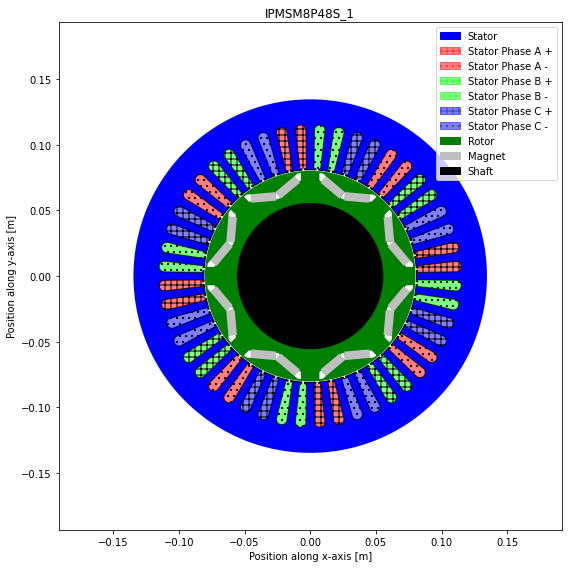

In [23]:
# 머신 로드

%matplotlib inline

# Load the machine
from os.path import join
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR
print(DATA_DIR)

femm_model = load((join(path,model)))

femm_model.plot()

## 스크립팅 모드에서 머신 정의
Pyleecan은 다른 클래스를 사용하여 스크립팅 모드에서 시스템을 정의할 수도 있습니다. 각 클래스는 _pyleecan/Generator/ClasseRef_ 폴더의 csv 파일에서 정의되며 모든 클래스의 문서는 전용 [웹페이지](https://www.pyleecan.org/pyleecan.Classes.html)에서 볼 수 있습니다.
다음 이미지는 머신 클래스 조직을 보여줍니다.

![](https://www.pyleecan.org/_static/machine_classes_UML.png)

모든 회전자와 고정자는 **Lamination** 클래스 또는 daughter 중 하나로 생성할 수 있습니다.

![](https://www.pyleecan.org/_static/lamination_classes_UML.png)

스크립팅을 사용하면 다음과 같이 GUI에서 정의할 수 없는 일부 복잡한 시스템을 정의할 수 있습니다.

## 고정자 정의
고정자를 정의하기 위해 다른 매개변수를 사용하여 [**LamSlotWind**](http://pyleecan.org/pyleecan.Classes.LamSlotWind.html) 객체를 초기화합니다. pyleecan에서 모든 매개변수는 SI 단위로 설정해야 합니다.

In [24]:
# 고정자 정의하기
#  LamSlotWind = Lamination with Slot filled with winding

from pyleecan.Classes.LamSlotWind import LamSlotWind

mm = 1e-3  # Millimeter

# Lamination setup
stator = LamSlotWind(
    Rint=80.95 * mm, # internal radius [m]  * 내경
    Rext=134.62 * mm, # external radius [m] *외경
    L1=83.82 * mm, # Lamination stack active length [m] without radial ventilation airducts  *적층
                # but including insulation layers between lamination sheets
    Kf1=0.95, # Lamination stacking / packing factor *적층 계수
    is_internal= False, # 요크의 위치
    is_stator=True, 
)



그런 다음 25개의 슬롯 클래스 중 하나인 [**SlotW11**](http://pyleecan.org/pyleecan.Classes.SlotW11.html)을 사용하여 48개의 슬롯을 추가합니다.

(<Figure size 576x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Stator with winding'}, xlabel='(m)', ylabel='(m)'>)

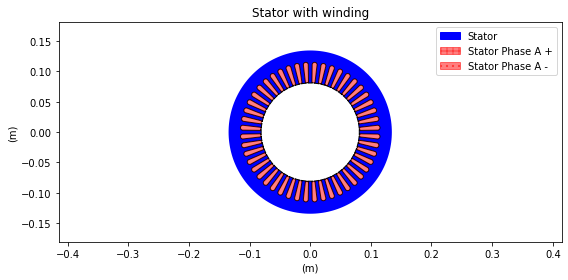

In [25]:
from pyleecan.Classes.SlotW11 import SlotW11

# Slot setup
stator.slot =  SlotW11(
    Zs=48, # Slot number
    H0=1.0 * mm,  # Slot isthmus height 폴슈 길이
    H1=0, # 슬롯 높이
    H2=33.3 * mm, # Slot height below wedge 
    W0=1.93 * mm,  # Slot isthmus width
    W1=5 * mm, # Slot top width
    W2=8 * mm, # Slot bottom width
    R1=4 * mm # Slot bottom radius
)

stator.plot()

슬롯의 경우 [**WindingDW1L**](http://pyleecan.org/pyleecan.Classes.WindingDW1L.html) 및 [**CondType11**](http:/ /pyleecan.org/pyleecan.Classes.CondType11.html). 권선에 대한 규칙은 [pyleecan 웹사이트](https://pyleecan.org/winding.convention.html)에 자세히 설명되어 있습니다. 
-> WindingDW1L Class는 현재 2022.5.6기준 Winding으로 통합됨

(<Figure size 576x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Stator with winding'}, xlabel='(m)', ylabel='(m)'>)

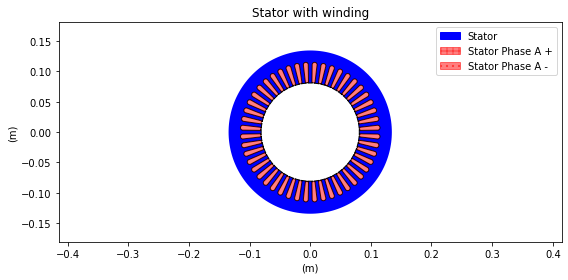

In [26]:
# 권선 입력
#from pyleecan.Classes.WindingDW1L import WindingDW1L = single layer overlapping integral distributed winding


from pyleecan.Classes.Winding import Winding

from pyleecan.Classes.CondType11 import CondType11

stator.winding = Winding(
    qs=3,  # number of phases
    Lewout=0,  # staight length of conductor outside lamination before EW-bend  엔드와인딩이 구부러지기전 삐져나온부분
    p=4,  # number of pole pairs
    Ntcoil=8,  # number of turns per coil 
    Npcp=1,  # number of parallel circuits per phase
    coil_pitch = 5,
    Nslot_shift_wind=0,  # 0 not to change the stator winding connection matrix built by pyleecan number 
                         # of slots to shift the coils obtained with pyleecan winding algorithm 
                         # (a, b, c becomes b, c, a with Nslot_shift_wind1=1)
    is_reverse_wind= False # True to reverse the default winding algorithm along the airgap 
                         # (c, b, a instead of a, b, c along the trigonometric direction)
)

# Conductor setup 각동선
stator.winding.conductor = CondType11(
    Nwppc_tan=1, # stator winding number of preformed wires (strands) 
                 # in parallel per coil along tangential (horizontal) direction
    Nwppc_rad=8, # stator winding number of preformed wires (strands) 
                 # in parallel per coil along radial (vertical) direction 
    Wwire=0.000912, #  single wire width without insulation [m]
    Hwire=2e-3, # single wire height without insulation [m]
    Wins_wire=1e-6, # winding strand insulation thickness [m]

    type_winding_shape=0, # type of winding shape for end winding length calculation
                          # 0 for hairpin windings
                          # 1 for normal windings
)
stator.plot()

## 로터 정의

이 예에서는 [**LamHole**](http://www.pyleecan.org/pyleecan.Classes.LamHole.html) 클래스를 사용하여 회전자를 자석을 포함할 구멍이 있는 적층으로 정의합니다.

고정자와 같은 방식으로 적층을 정의하는 것으로 시작합니다.

In [27]:
# 회전자 정의
from pyleecan.Classes.LamHole import LamHole
# LamHole = Lamination with Hole with or without magnet or winding

# Rotor setup
rotor = LamHole(
    Rint=55.32 * mm, # Internal radius
    Rext=80.2 * mm, # external radius
    is_internal=True,
    is_stator=False,
    L1=stator.L1 # Lamination stack active length [m] 
                 # without radial ventilation airducts but including insulation layers between lamination sheets
)

그 후 [**HoleM50**](http://www.pyleecan.org/pyleecan.Classes.HoleM50.html) 클래스를 사용하여 회전자에 자석이 있는 구멍을 추가할 수 있습니다.

(<Figure size 576x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Rotor with Interior Magnet'}, xlabel='(m)', ylabel='(m)'>)

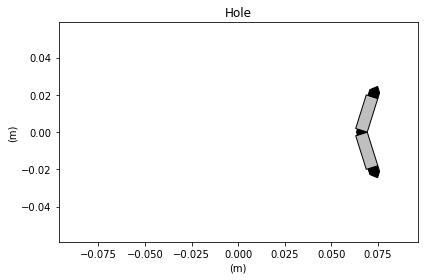

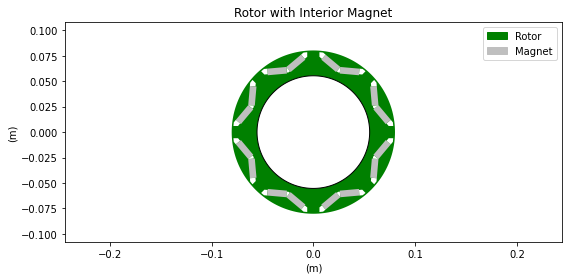

In [28]:
# HoleM50 = V shape slot for buried magnet
from pyleecan.Classes.HoleM50 import HoleM50
rotor.hole = list()
rotor.hole.append(
    HoleM50( 
        Zh=8, # Number of Hole around the circumference (극수와 동일)
        W0=42.0 * mm,  # Slot opening
        W1=0, # Tooth width (at V bottom)
        W2=0, # Distance Magnet to bottom of the V 
        W3=12.0 * mm, # Tooth width (at V top) # 베리어의 크기를 결정
        W4=18.9 * mm, # Magnet Width
        H0=10.96 * mm, # Slot Depth
        H1=1.5 * mm, # Distance from the lamination Bore
        H2=1 * mm, # Additional depth for the magnet
        H3=6.5 * mm, # Magnet Height
        H4=0* mm, # Slot top height
    )
)
rotor.hole[0].plot()
rotor.plot()

구멍은 여러 층의 구멍을 생성하거나 다른 종류의 구멍을 결합할 수 있는 목록으로 정의됩니다.

## 샤프트와 프레임 생성

클래스 [**Shaft**](http://www.pyleecan.org/pyleecan.Classes.Shaft.html) 및 [**Frame**](http://www.pyleecan.org/pyleecan.Classes .Frame.html)을 사용하여 기계에 샤프트와 프레임을 추가할 수 있습니다. 이 예에는 프레임이 없습니다.

(<Figure size 576x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Shaft'}, xlabel='(m)', ylabel='(m)'>)

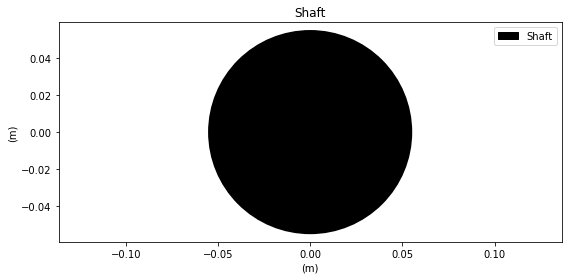

In [29]:
from pyleecan.Classes.Shaft import Shaft
from pyleecan.Classes.Frame import Frame

# Set shaft
shaft = Shaft(Drsh=rotor.Rint * 2, # Diamater of the rotor shaft [m]
                                   # used to estimate bearing diameter for friction losses
              Lshaft=1.2 # length of the rotor shaft [m] 
             )
frame = None

shaft.plot()

## 세트 재료 및 자석

모든 Pyleecan 객체는 'save' 메소드를 사용하여 JSON으로 저장할 수 있으며 'load' 기능으로 로드할 수 있습니다.
이 예에서 재료 *M400_50A* 및 *Copper1*이 로드되고 해당 속성에 설정됩니다.

In [30]:
# 물질값 불러오기

M400_50A = load(join(DATA_DIR, "Material", "M400-50A.json"))
Copper1 = load(join(DATA_DIR, "Material", "Copper1.json"))

# Set Materials
stator.mat_type = M400_50A  # Stator Lamination material
rotor.mat_type = M400_50A  # Rotor Lamination material
stator.winding.conductor.cond_mat = Copper1  # Stator winding conductor material


재료는 스크립팅에서 다른 Pyleecan 객체로 정의할 수도 있습니다. 재료 *Magnet_prius*는 [**Material**](http://www.pyleecan.org/pyleecan.Classes.Material.html) 및 [**MatMagnetics**](http://www .pyleecan.org/pyleecan.Classes.MatMagnetics.html).

In [31]:
# 자석 물질 값 정의
from pyleecan.Classes.Material import Material
from pyleecan.Classes.MatMagnetics import MatMagnetics

# Defining magnets
Magnet_prius = Material(name="Magnet_prius")

# Definition of the magnetic properties of the material
Magnet_prius.mag = MatMagnetics(
    mur_lin = 1.05, # Relative magnetic permeability (상대 투자율)
    alpha_Br = -0.001, # temperature coefficient for remanent flux density /°C compared to 20°C 
    Brm20 = 1.24, # magnet remanence induction at 20°C [T] (잔류 자속밀도)
)

# Definition of the electric properties of the material 
Magnet_prius.elec.rho = 1.6e-06 # Resistivity at 20°C

# Definition of the structural properties of the material
Magnet_prius.struct.rho = 7500.0 # mass per unit volume [kg/m3]

자석 재료는 "magnet_X" 속성으로 설정됩니다. Pyleecan은 구멍의 각 자석에 대해 서로 다른 자화 또는 재료를 정의할 수 있습니다. 여기서 두 자석은 동일하게 정의됩니다.

In [32]:
# Set magnets in the rotor hole 구멍이 총 두개다 좌우로 하나씩
rotor.hole[0].magnet_0.mat_type = Magnet_prius
rotor.hole[0].magnet_1.mat_type = Magnet_prius
rotor.hole[0].magnet_0.type_magnetization = 1
rotor.hole[0].magnet_1.type_magnetization = 1

## 머신 생성, 저장 및 플롯
마지막으로 Machine 객체는 [**MachineIPMSM**](http://www.pyleecan.org/pyleecan.Classes.MachineIPMSM.html)을 사용하여 생성하고 `save' 메소드를 사용하여 저장할 수 있습니다.

[11:17:42] Saving MachineIPMSM to file 'IPMSM_Toyota_Prius_2004.json'.
Saving MachineIPMSM to file 'IPMSM_Toyota_Prius_2004.json'.


<IPython.core.display.Javascript object>


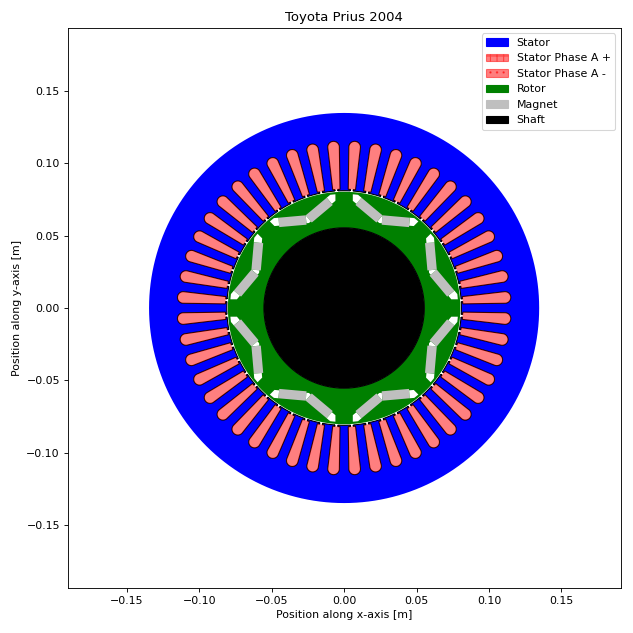

In [33]:
# 생성한 고정자, 회전자, 샤프트 결합

from pyleecan.Classes.MachineIPMSM import MachineIPMSM

%matplotlib notebook
IPMSM_Prius_2004 = MachineIPMSM(
    name="Toyota Prius 2004", 
    stator=stator, 
    rotor=rotor, 
    shaft=shaft, 
    frame=None
)
IPMSM_Prius_2004.save('IPMSM_Toyota_Prius_2004.json')

IPMSM_Prius_2004.plot()

im=IPMSM_Prius_2004.plot


Pyleecan은 다음 클래스 덕분에 환기 덕트도 처리합니다.
- [**환기순환**](http://www.pyleecan.org/pyleecan.Classes.VentilationCirc.html)
- [**VentilationPolar**](http://www.pyleecan.org/pyleecan.Classes.VentilationPolar.html)
- [**환기트랩**](http://www.pyleecan.org/pyleecan.Classes.VentilationTrap.html)

# 2) FEMM을 사용한 자기 모델 - Mag/Simu Class

웨비나의 이 부분에서는 pyleecan **자동 커플링과 FEMM**을 사용하여 **자속 및 전자기 토크**를 계산하는 다양한 단계를 보여줍니다. Pyleecan에 정의된 모든 전기 기계는 [FEMM](http://www.femm.info/wiki/HomePage)에서 자동으로 그려 토크, 에어갭 자속 및 기전력을 계산할 수 있습니다.

## 시뮬레이션 정의
### 입력

시뮬레이션은 [**Simu1**](http://www.pyleecan.org/pyleecan.Classes.Simu1.html) 객체로 정의됩니다. 이 개체는 5개의 순차 물리(또는 모듈)가 있는 시뮬레이션에 해당합니다.
- 전기
- 자기
- 힘
- 구조적
- 음향

각 물리/모듈은 이를 해결하기 위해 여러 모델을 가질 수 있습니다. 현재 pyleecan에는 다음이 포함됩니다.
- FEMM이 있는 PMSM 기계용 전기 모델
- 모든 기계에 FEMM이 있는 마그네틱 모델
- Force 모델(Maxwell Tensor)
- GMSH/Elmer를 사용한 자기 및 구조 모델

[**Simu1**](http://www.pyleecan.org/pyleecan.Classes.Simu1.html) 개체는 각 물리 간의 약한 결합을 적용합니다. 각 물리의 입력은 이전 물리의 출력입니다.

자기 물리학은 개체 [**MagFEMM**](https://www.pyleecan.org/pyleecan.Classes.MagFEMM.html)로 정의되고 다른 물리학은 비활성화됩니다(없음으로 설정).

[**InputCurrent**](http://www.pyleecan.org/pyleecan.Classes.InputCurrent.html) 객체로 시뮬레이션의 시작점을 정의하여 전기 모듈 출력을 다음과 같이 적용합니다.
- 각도 및 시간 이산화
- 로터 속도
- 고정자 전류

In [34]:
# 전자계 시뮬레이션 정의

from os.path import join

from numpy import ones, pi, array, linspace, cos, sqrt

from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.InputCurrent import InputCurrent
from pyleecan.Classes.MagFEMM import MagFEMM

from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR
from pyleecan.Classes.OPdq import OPdq 

testModel= load(join(path,model))


# Create the Simulation 시뮬레이션 정의
simu_femm = Simu1(name="tuto1_MagFemm", machine=testModel)   
p = simu_femm.machine.stator.winding.p            # 4 극쌍수
qs = simu_femm.machine.stator.winding.qs          # 3 상수


# Defining Simulation Input
simu_femm.input = InputCurrent()
# 회전자 속도 정의 [rpm]
N0 = 2000   #RPM
# 운전점 정의
simu_femm.input.OP = OPdq(N0=N0)


# 시간 이산화 (time discretization) [s]
time = linspace(start=0, stop=60/N0, num=32*p, endpoint=False) # 32*p timesteps
# 60/NO = 기계적 1주기, num = Step

simu_femm.input.time = time 

# 각도 이산화 (Angular discretization along the airgap circonference for flux density calculation)
simu_femm.input.angle = linspace(start = 0, stop = 2*pi, num=1024, endpoint=False) # 2048 steps 

angle = linspace(start = 0, stop = 2*pi, num=1024, endpoint=False) # 2048 steps 


In [35]:
print(time)
time.shape

[0.         0.00023437 0.00046875 0.00070312 0.0009375  0.00117187
 0.00140625 0.00164062 0.001875   0.00210938 0.00234375 0.00257812
 0.0028125  0.00304688 0.00328125 0.00351562 0.00375    0.00398438
 0.00421875 0.00445312 0.0046875  0.00492188 0.00515625 0.00539062
 0.005625   0.00585938 0.00609375 0.00632812 0.0065625  0.00679687
 0.00703125 0.00726562 0.0075     0.00773437 0.00796875 0.00820313
 0.0084375  0.00867187 0.00890625 0.00914062 0.009375   0.00960937
 0.00984375 0.01007813 0.0103125  0.01054687 0.01078125 0.01101562
 0.01125    0.01148437 0.01171875 0.01195313 0.0121875  0.01242187
 0.01265625 0.01289062 0.013125   0.01335937 0.01359375 0.01382813
 0.0140625  0.01429687 0.01453125 0.01476562 0.015      0.01523437
 0.01546875 0.01570312 0.0159375  0.01617187 0.01640625 0.01664062
 0.016875   0.01710937 0.01734375 0.01757812 0.0178125  0.01804688
 0.01828125 0.01851563 0.01875    0.01898437 0.01921875 0.01945312
 0.0196875  0.01992187 0.02015625 0.02039062 0.020625   0.0208

(128,)

In [36]:
print(angle)
angle.shape

[0.00000000e+00 6.13592315e-03 1.22718463e-02 ... 6.26477754e+00
 6.27091346e+00 6.27704938e+00]


(1024,)

In [37]:
# simu_femm.input 정보 확인. 이산화된 시간,각도 등 전류 미입력 상태
print(simu_femm.input)

parent = <class 'pyleecan.Classes.Simu1.Simu1'> object
time = parent = <class 'pyleecan.Classes.InputCurrent.InputCurrent'> object
	is_transpose = False
	value = 
	[0.         0.00023437 0.00046875 0.00070312 0.0009375  0.00117187
 0.00140625 0.00164062 0.001875   0.00210938 0.00234375 0.00257812
 0.0028125  0.00304688 0.00328125 0.00351562 0.00375    0.00398438
 0.00421875 0.00445312 0.0046875  0.00492188 0.00515625 0.00539062
 0.005625   0.00585938 0.00609375 0.00632812 0.0065625  0.00679687
 0.00703125 0.00726562 0.0075     0.00773437 0.00796875 0.00820313
 0.0084375  0.00867187 0.00890625 0.00914062 0.009375   0.00960937
 0.00984375 0.01007813 0.0103125  0.01054687 0.01078125 0.01101562
 0.01125    0.01148437 0.01171875 0.01195313 0.0121875  0.01242187
 0.01265625 0.01289062 0.013125   0.01335937 0.01359375 0.01382813
 0.0140625  0.01429687 0.01453125 0.01476562 0.015      0.01523437
 0.01546875 0.01570312 0.0159375  0.01617187 0.01640625 0.01664062
 0.016875   0.01710937 0.0173437

In [38]:

#  시간의 함수로서의 고정자 전류, 각 열은 하나의 위상에 해당합니다[A]
I0_rms = 250/sqrt(2) 
felec = p * N0 /60 # [Hz]  # 전기적 주파수
rot_dir = simu_femm.machine.stator.comp_mmf_dir()
Phi0 = 140*pi/180  # Maximum Torque Per Amp  - 위상각

Ia = (
    I0_rms
    * sqrt(2)
    * cos(2 * pi * felec * time + 0 * rot_dir * 2 * pi / qs + Phi0 + 90*pi/180)
)
Ib = (
    I0_rms
    * sqrt(2)
    * cos(2 * pi * felec * time + 1 * rot_dir * 2 * pi / qs + Phi0 + 90*pi/180)
)
Ic = (
    I0_rms
    * sqrt(2)
    * cos(2 * pi * felec * time + 2 * rot_dir * 2 * pi / qs + Phi0 + 90*pi/180)
)
simu_femm.input.Is = array([Ia, Ib, Ic]).transpose()

이 예에서 고정자 전류는 각 위상에 대한 시간 함수로 적용됩니다. 사인파 전류는 [이 튜토리얼](https://www.pyleecan.org/tuto_Operating_point.html)에 설명된 대로 Id/Iq로 정의할 수도 있습니다.

### MagFEMM 구성
Magnetic 모듈의 구성을 위해 FEMM을 호출하여 에어갭 자속 밀도를 계산하는 객체 [**MagFEMM**](https://www.pyleecan.org/pyleecan.Classes.MagFEMM.html)를 사용합니다. 모델 매개변수는 [**MagFEMM**](https://www.pyleecan.org/pyleecan.Classes.MagFEMM.html) 객체의 속성을 통해 설정됩니다. 이 튜토리얼에서 우리는 주요 것들을 제시할 것입니다. 전체 목록은 [**Magnetics**](http://www.pyleecan.org/pyleecan.Classes.Magnetics.html) 및 [**MagFEMM* *](http://www.pyleecan.org/pyleecan.Classes.MagFEMM.html) 클래스 문서.

*type_BH_stator* 및 *type_BH_rotor*를 사용하면 FEMM에서 적층의 B(H) 곡선을 모델링하는 방법을 선택할 수 있습니다. 재료 매개변수와 특히 B(H) 곡선은 [기계에서](https://www.pyleecan.org/tuto_Machine.html) 직접 설정됩니다.

In [39]:
from pyleecan.Classes.MagFEMM import MagFEMM

simu_femm.mag = MagFEMM(
    type_BH_stator=0, # 0 to use the material B(H) curve, 
                      # 1 to use linear B(H) curve according to mur_lin,
                      # 2 to enforce infinite permeability (mur_lin =100000)
    type_BH_rotor=0,  # 0 to use the material B(H) curve, 
                      # 1 to use linear B(H) curve according to mur_lin,
                      # 2 to enforce infinite permeability (mur_lin =100000)
    file_name = "NGV8P48S1_MagFemm", # Name of the file to save the FEMM model
)

# Only the magnetic module is defined
simu_femm.elec = None
simu_femm.force = None
simu_femm.struct = None 

FEMM과 Pyleecan 커플링을 사용하면 대칭 및 슬라이딩 밴드로 기계를 정의하여 계산 시간을 최적화할 수 있습니다. 기계의 각 주기성이 계산되고 (특정 경우) 기계의 1/8만 그려집니다(4 대칭 + 반주기):

In [40]:
simu_femm.mag.is_periodicity_a=True

시간 주기성에 대해서도 동일한 작업이 수행됩니다. 한 전기 주기의 절반만 계산됩니다(즉, 기계적 주기의 1/8).

In [41]:
simu_femm.mag.is_periodicity_t=True

Pyleecan은 다음을 간단히 설정하여 FEMM에 대한 호출을 병렬화할 수 있습니다.

In [42]:
simu_femm.mag.nb_worker = 4  # Number of FEMM instances to run at the same time (1 by default)

시뮬레이션이 끝나면 메시와 솔루션을 다음을 사용하여 출력 개체에 저장할 수 있습니다.

In [43]:
simu_femm.mag.is_get_meshsolution = True # To get FEA mesh for latter post-procesing
simu_femm.mag.is_save_meshsolution_as_file = False # To save FEA results in a dat file

## 시뮬레이션 실행

In [44]:
out_femm = simu_femm.run()

[11:18:13] Starting running simulation tuto1_MagFemm (machine=IPMSM8P48S_1)
[11:18:13] Starting Magnetic module
[11:18:14] Computing Airgap Flux in FEMM
[11:18:16] End of simulation tuto1_MagFemm


시뮬레이션을 실행할 때 FEMM 창이 백그라운드에서 실행됩니다. 그것을 열면 pyleecan이 기계를 그리고 표면을 정의하는 것을 볼 수 있습니다.
![](https://www.pyleecan.org/_static/IPMSM_FEMM.png)
시뮬레이션은 현재 및 슬라이딩 밴드 경계 조건을 업데이트하여 16개의 다른 시간 단계를 계산합니다.

시뮬레이션이 완료되면 출력 개체가 반환됩니다. 결과는 출력의 자기 부분(예: _out_femm.mag_ )에 저장되며 다른 플롯을 호출할 수 있습니다. 이 _out_femm.mag_에는 다음이 포함됩니다.
- *시간*: 대칭이 없는 자기 시간 벡터
- *각도*: 대칭이 없는 자기 위치 벡터
- *B*: 에어갭 자속 밀도(방사형 및 접선 성분 포함)
- *Tem*: 전자기 토크
- *Tem_av*: 평균 전자기 토크
- *Tem_rip_pp* : 피크 대 피크 토크 리플
- *Tem_rip_norm*: 평균 토크에 따라 정규화된 Peak to Peak Torque 리플
- *Phi_wind_stator*: 고정자 권선 자속
- *emf*: 기전력

이러한 속성 중 일부는 [SciDataTool](https://github.com/Eomys/SciDataTool) 프로젝트의 "데이터 개체"입니다. 이 개체는 단위 변환, 보간, fft, 주기성 등을 처리할 수 있도록 합니다. 두 번째 웨비나에서 자세히 소개합니다.

## 플롯 결과
**출력** 개체는 결과를 쉽게 시각화하기 위해 다른 플롯을 포함합니다. 전용 튜토리얼은 [여기](https://www.pyleecan.org/tuto_Plots.html)에서 사용할 수 있습니다.

예를 들어, 특정 시간 단계에서 에어갭의 방사형 및 접선 방향 자속은 다음과 같이 표시할 수 있습니다.

<IPython.core.display.Javascript object>


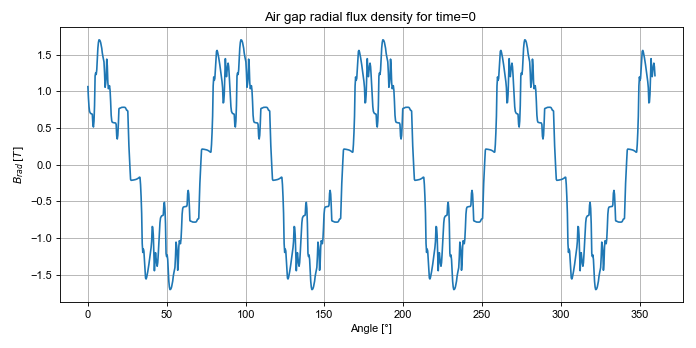

In [45]:
# 방사방향 자속 밀도 확인 - 공간적 Radial magnetic flux over space  # time[원하는 시간 step] 
out_femm.mag.B.plot_2D_Data("angle{°}","time[0]",component_list=["radial"])

<IPython.core.display.Javascript object>


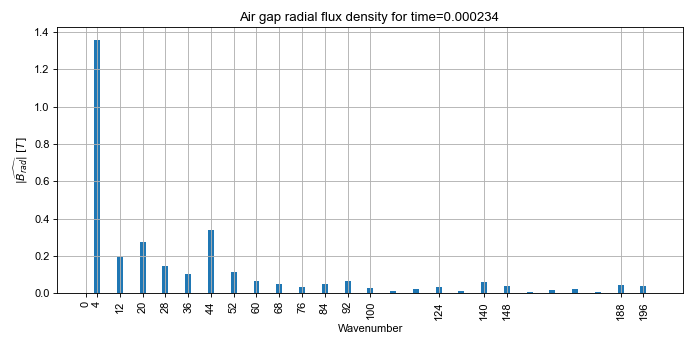

In [46]:
# Radial magnetic flux FFT over space "wavenumber=[0,보고 싶은 차수 범위]"
out_femm.mag.B.plot_2D_Data("wavenumber=[0,200]","time[1]", component_list=["radial"])

<IPython.core.display.Javascript object>


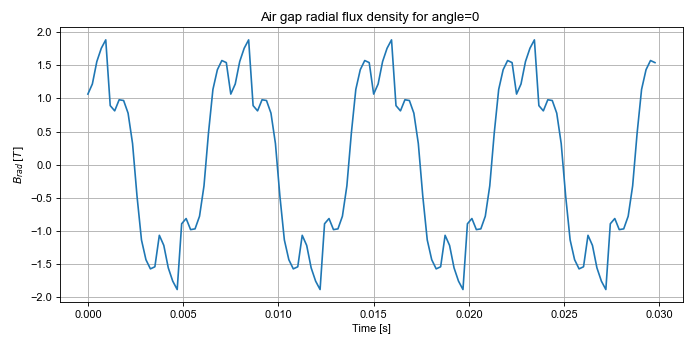

<IPython.core.display.Javascript object>


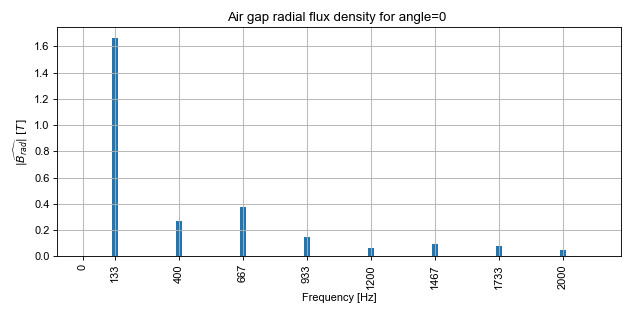

In [47]:
# 방사 방향 자속 밀도 확인 - 시간적 Radial magnetic flux over space 
out_femm.mag.B.plot_2D_Data("time","angle[0]",component_list=["radial"])

# Radial magnetic flux FFT over time 축이 주파수임 (전기적 주파수 * p배 차수가 메인)
out_femm.mag.B.plot_2D_Data("freqs=[0,12000]","angle[0]",component_list=["radial"])


<IPython.core.display.Javascript object>


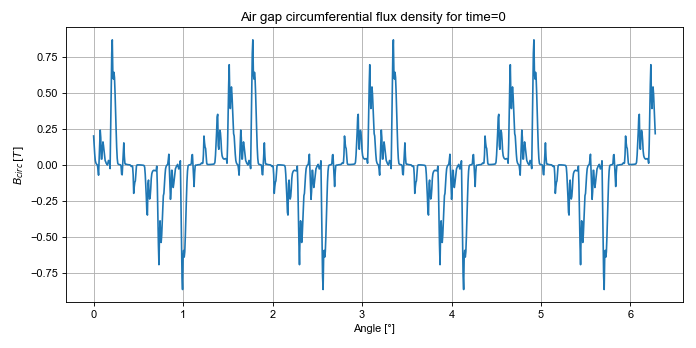

<IPython.core.display.Javascript object>


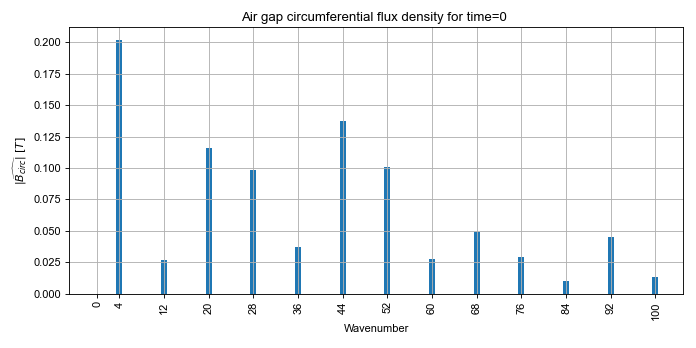

In [50]:
# 접선 방향 자속밀도 확인 - 공간적 Tangential magnetic flux over space
out_femm.mag.B.plot_2D_Data("angle","time[0]", component_list=["tangential"])

out_femm.mag.B.plot_2D_Data("wavenumber=[0,100]","time[0]", component_list=["tangential"])

<IPython.core.display.Javascript object>


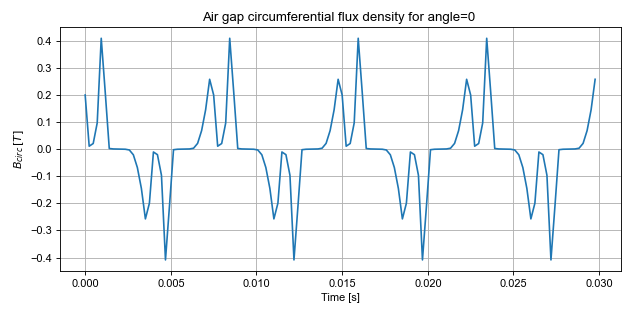

<IPython.core.display.Javascript object>


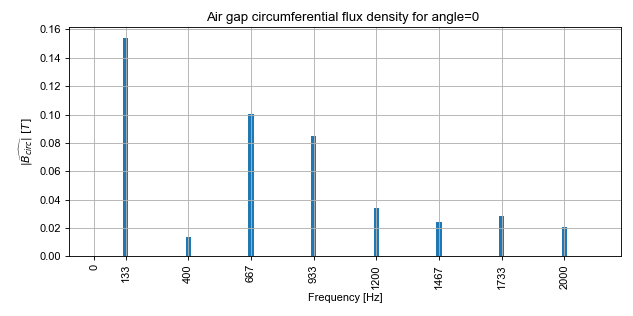

In [51]:
# 접선 방향 자속밀도 확인 - 시간적 Tangential magnetic flux over time
out_femm.mag.B.plot_2D_Data("time","angle[0]",component_list=["tangential"])

# Radial magnetic flux FFT over time 축이 주파수임 (전기적 주파수 * p배 차수가 메인)
out_femm.mag.B.plot_2D_Data("freqs=[0,12000]","angle[0]",component_list=["tangential"])

<IPython.core.display.Javascript object>


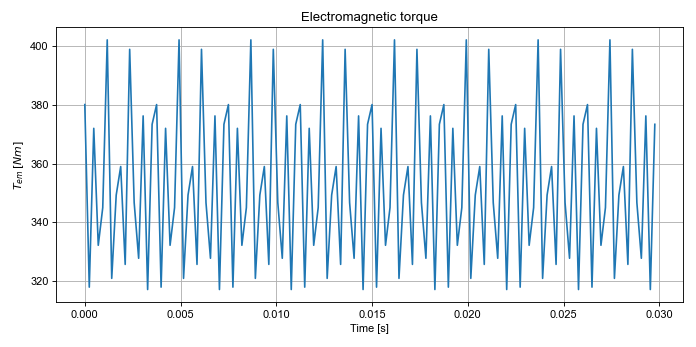

<IPython.core.display.Javascript object>


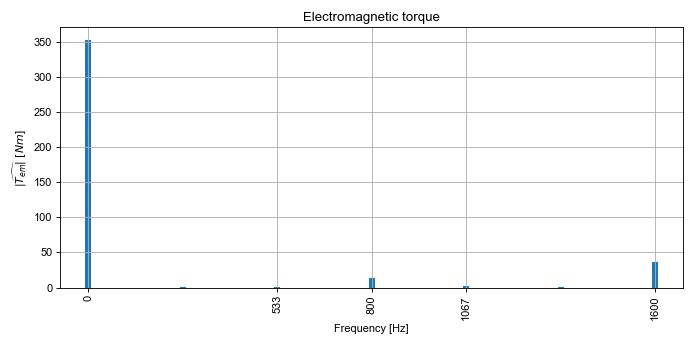

In [52]:
# 토크 결과 확인 Torque
out_femm.mag.Tem.plot_2D_Data("time")
out_femm.mag.Tem.plot_2D_Data("freqs=[0,5000]")

메쉬가 출력 객체에 저장된 경우(simu_femm.mag.is_get_meshsolution = True) 다음과 같이 플롯할 수 있습니다.

In [29]:
# out_femm.mag.meshsolution.plot_contour(label="B", group_names="stator core")

In [53]:
# 3차원
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode 
init_notebook_mode() 

result = out_femm.mag.B.components["radial"].get_along("angle{°}", "time")
x = result["angle"]
y = result["time"]
z = result["Br"]
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout( )
fig.update_layout(title='Radial flux density in the airgap over time and angle',
                  autosize=True,
                  scene = dict(
                      xaxis_title='Angle [°]',
                      yaxis_title='Time [s]',
                      zaxis_title='Flux [T]'
                  ),
                  width=700,
                  margin=dict(r=20, b=100, l=10, t=100),
                 )

fig.show(config = {"displaylogo":False})

KeyError: 'Br'

# 3) 동작점 설정 방법 - InputCurrent Class
 이 부분에서는 개체 OPdq, InputCurrent 및 VarLoadCurrent를 사용하여 Id/Iq 또는 I0/Phi0을 설정하여 여러 작동 지점에서 자기 시뮬레이션을 실행하는 방법을 설명합니다.

 이 부분을 검증하는 데 사용된 참조 자료는 \[3\]입니다. Z. Yang, M. Krishnamurthy 및 I. P. Brown, "전체 토크 속도 범위에서 IPM의 전자기 및 진동 특성"

In [54]:
from pyleecan.Classes.Simu1 import Simu1  #시뮬레이션 하는 방식
from pyleecan.Classes.MagFEMM import MagFEMM  #전자계 femm 작동

# 시뮬레이션 초기화
simu_op = Simu1(name="tuto_1_Id_Iq", machine=testModel)

# 자기 시뮬레이션의 정의(대칭 및 슬라이딩 밴드가 있는 FEMM)
simu_op.mag = MagFEMM(
    type_BH_stator=0,
    type_BH_rotor=0,
    is_periodicity_a=True,
    is_periodicity_t=True,
    Kgeo_fineness=1,
    nb_worker=4,        # 병렬 호출
)
# 자기 모듈만 정의됨
simu_op.elec = None
simu_op.force = None
simu_op.struct = None

## Id/Iq로 동작점 정의하기
InputCurrent 개체를 사용하면 전기 모듈의 출력과 자기 모듈의 입력에 해당하는 "OutElec" 개체를 만들 수 있습니다. 이 예에서 InputCurrent는 Id_ref 및 Iq_ref로 정의된 사인파 전류로 시작점을 정의하는 데 사용됩니다.

In [55]:
# id/iq, 위상각으로 동작점 정의 (OPdq사용)

from pyleecan.Classes.InputCurrent import InputCurrent
from numpy import exp
import numpy as np

#정현파 전류의 정의
simu_op.input = InputCurrent()

# I0, Phi0 설정
I0_rms = 250/sqrt(2) # Maximum current [Arms]
Phi0 = 140*pi/180  # Maximum Torque Per Amp

# 해당 Id/Iq 계산
Id_ref = (I0_rms*exp(1j*Phi0)).real
Iq_ref = (I0_rms*exp(1j*Phi0)).imag

# 값 설정
#simu_op.input.Id_ref = Id_ref # [A] (RMS)
#simu_op.input.Iq_ref = Iq_ref # [A] (RMS)
#-> 
simu_op.input.OP = OPdq(Id_ref=Id_ref, Iq_ref=Iq_ref)


(Id_ref,Iq_ref)

(-135.4188051049254, 113.62986941801093)

전류 및 자기 계산을 위한 이산화는 다음 매개변수를 사용하여 설정할 수도 있습니다.

In [56]:
simu_op.input.Nt_tot = 128 # 시간 이산화
simu_op.input.Na_tot = 2048 # 공간 이산화
simu_op.input.OP.N0 = 2000 # Rotor speed [rpm]

Nt_tot가 정의되면 시간 벡터는 자동으로 다음과 같이 설정됩니다.

     linspace(0, 60 / N0 * Nrev, Nt_tot)

Nrev로 로터의 회전 수(기본값은 1)

Na_tot가 정의되면 각도 벡터는 자동으로 다음과 같이 설정됩니다.

     linspace(0, 2*pi, Na_tot)

이제 입력이 완전히 정의되었으며 시뮬레이션을 실행할 수 있습니다.

In [57]:
out_op = simu_op.run()

[11:32:35] Starting running simulation tuto_1_Id_Iq (machine=IPMSM8P48S_1)
[11:32:35] Starting Magnetic module
[11:32:36] Computing Airgap Flux in FEMM
[11:32:38] End of simulation tuto_1_Id_Iq


<IPython.core.display.Javascript object>


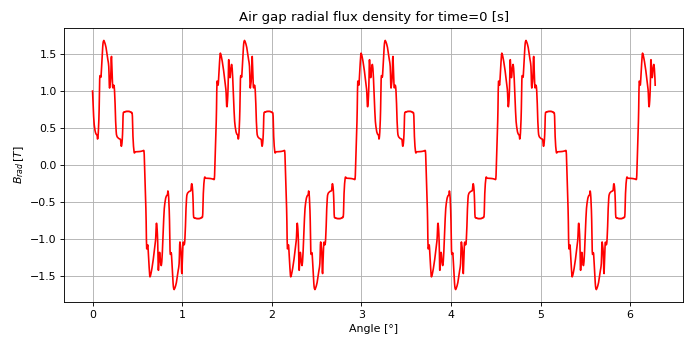

<IPython.core.display.Javascript object>


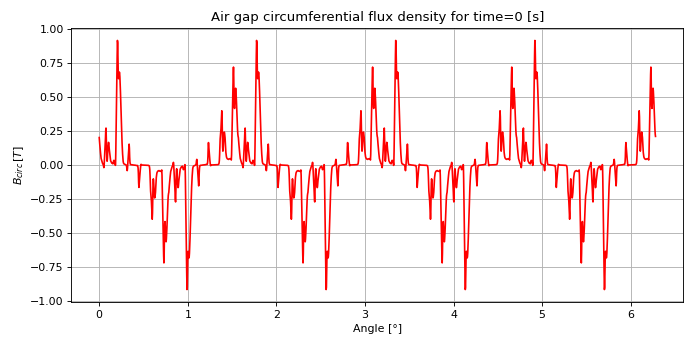

<IPython.core.display.Javascript object>


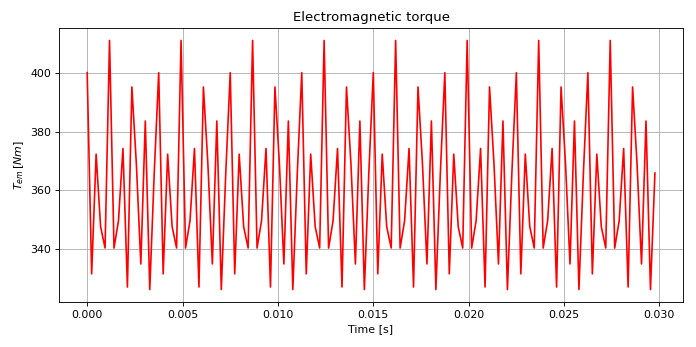

<IPython.core.display.Javascript object>


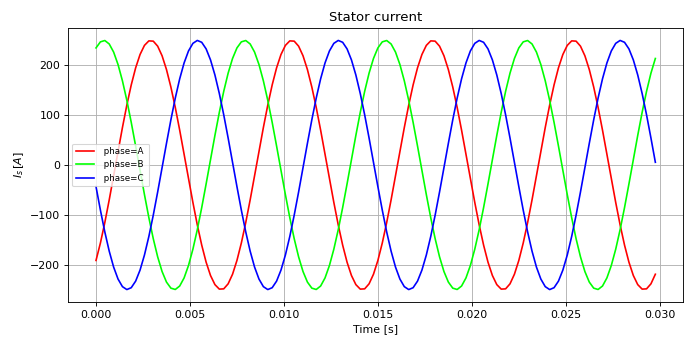

In [58]:
from pyleecan.Functions.Plot import dict_2D

# Plot the flux
out_op.mag.B.plot_2D_Data("angle", **dict_2D)
# Plot the torque
out_op.mag.Tem.plot_2D_Data("time", **dict_2D)
# Plot the current
out_op.elec.get_Is().plot_2D_Data("time", "phase[]", **dict_2D)